# Labs Access Analysis: 02 Stats Plot

## Setup

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import os
import time
import colorcet as cc

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [19]:
# Load data
data = pd.read_csv('data/labs.csv')

In [20]:
data.head()

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes
0,Fab Lab Barcelona,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN
1,MADE Makerspace Barcelona,Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN
2,Soko Tech,Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN
3,LSCongres,Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN
4,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN


,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes
0,Fab Lab Barcelona,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN
1,MADE Makerspace Barcelona,Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN
2,Soko Tech,Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN
3,LSCongres,Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN
4,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN


In [21]:
data["Notes"].describe()

count          6
unique         1
top       Closed
freq           6
Name: Notes, dtype: object

count          6
unique         1
top       Closed
freq           6
Name: Notes, dtype: object

In [22]:
data["Notes"].value_counts()

Closed    6
Name: Notes, dtype: int64

Closed    6
Name: Notes, dtype: int64

## Analysis - Type of Labs

In [23]:
data["Type"].describe()

count          72
unique         14
top       Fab Lab
freq           19
Name: Type, dtype: object

count          72
unique         14
top       Fab Lab
freq           19
Name: Type, dtype: object

In [24]:
data["Type"].value_counts()

Fab Lab                          19
Makerspace                       10
City Space                        7
University Lab                    6
Hackerspace                       6
Ateneu de Fabricació              6
Incubator/Accelerator             5
Service                           4
DIYBio Lab                        3
Foundation                        2
Library                           1
FabCafé                           1
Industry R&D Lab                  1
University + Industry R&D Lab     1
Name: Type, dtype: int64

Fab Lab                          19
Makerspace                       10
City Space                        7
University Lab                    6
Hackerspace                       6
Ateneu de Fabricació              6
Incubator/Accelerator             5
Service                           4
DIYBio Lab                        3
Foundation                        2
Library                           1
FabCafé                           1
Industry R&D Lab                  1
University + Industry R&D Lab     1
Name: Type, dtype: int64

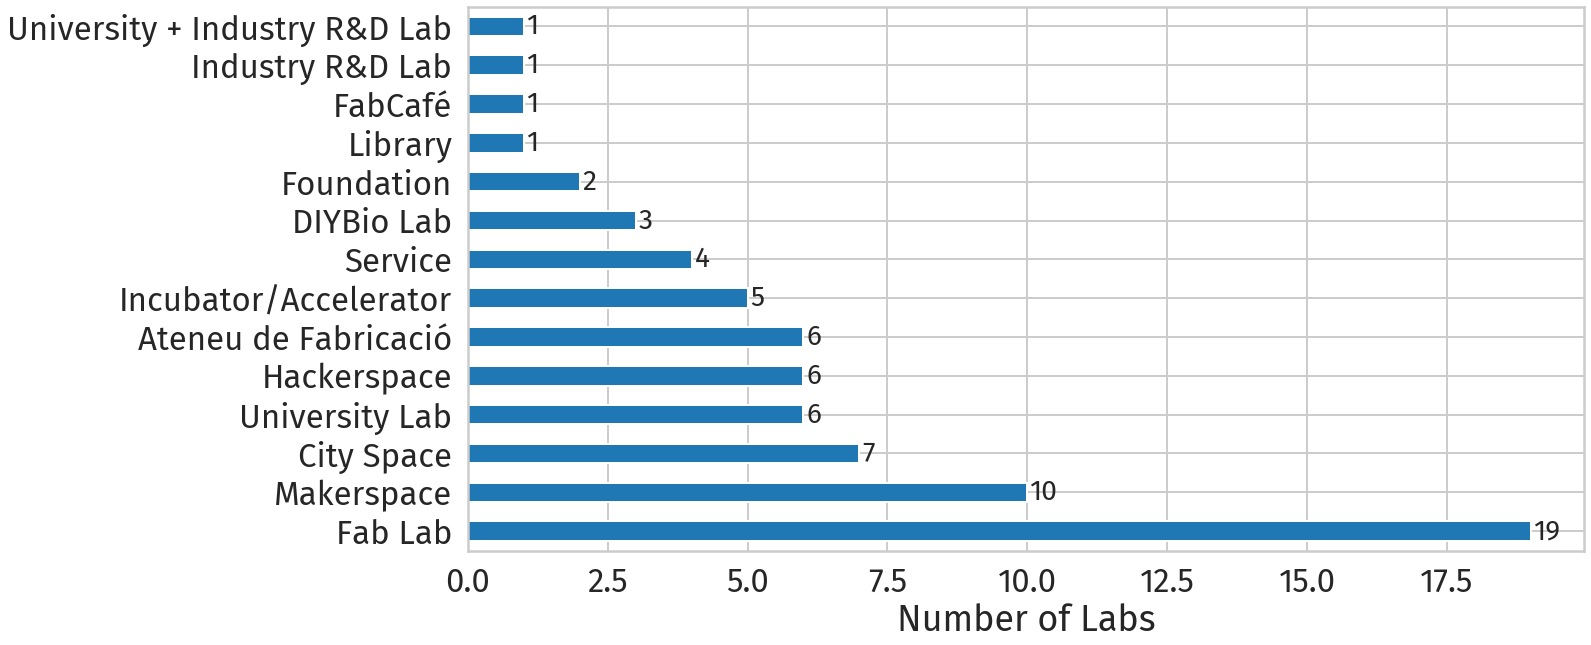

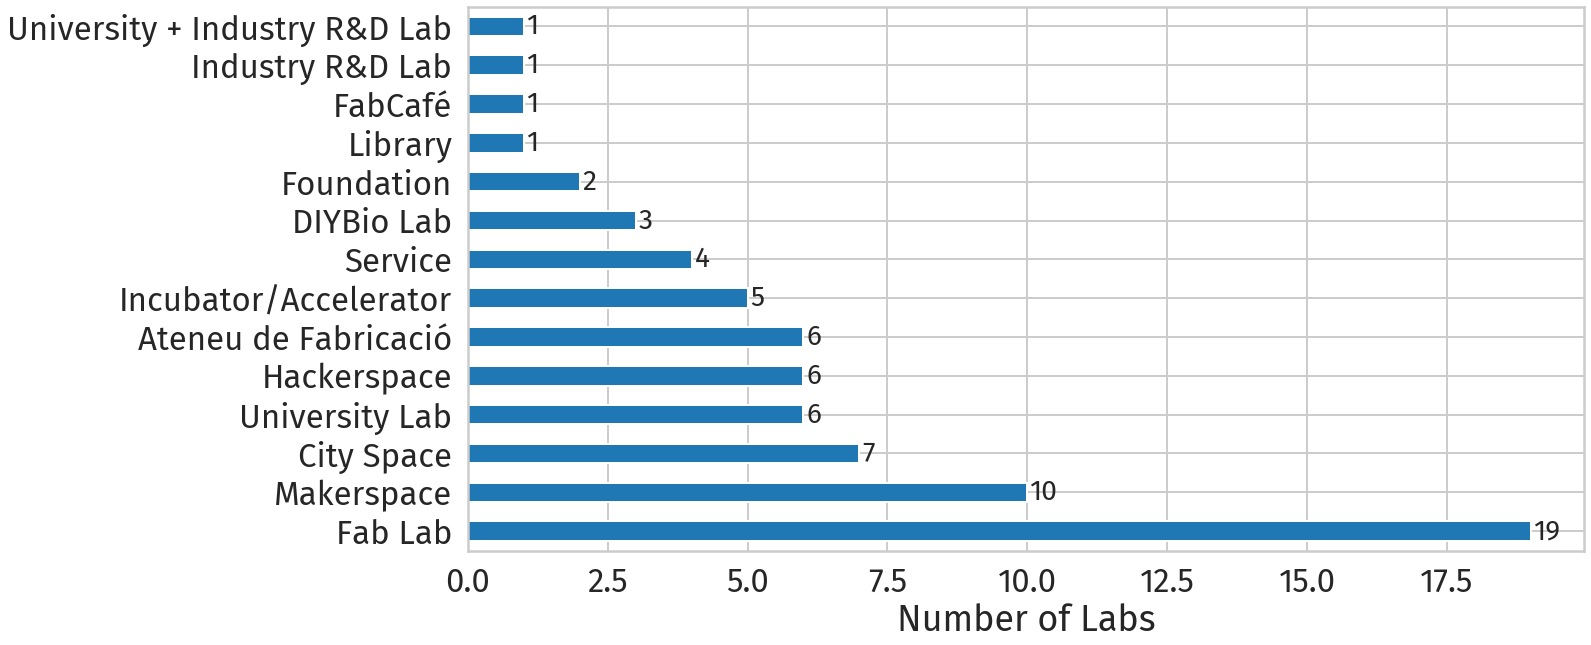

In [25]:
# Plot the data
ax = data["Type"].value_counts().plot(kind="barh", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Number of Labs')
plt.savefig("svg/labs_type.svg", bbox_inches="tight")
plt.savefig("png/labs_type.png", dpi=300, bbox_inches="tight")

## Analysis - Cities

In [26]:
data["Cluster"].describe()

count      72
unique      2
top       BCN
freq       50
Name: Cluster, dtype: object

count      72
unique      2
top       BCN
freq       50
Name: Cluster, dtype: object

In [27]:
data["Cluster"].value_counts()

BCN    50
MI     22
Name: Cluster, dtype: int64

BCN    50
MI     22
Name: Cluster, dtype: int64

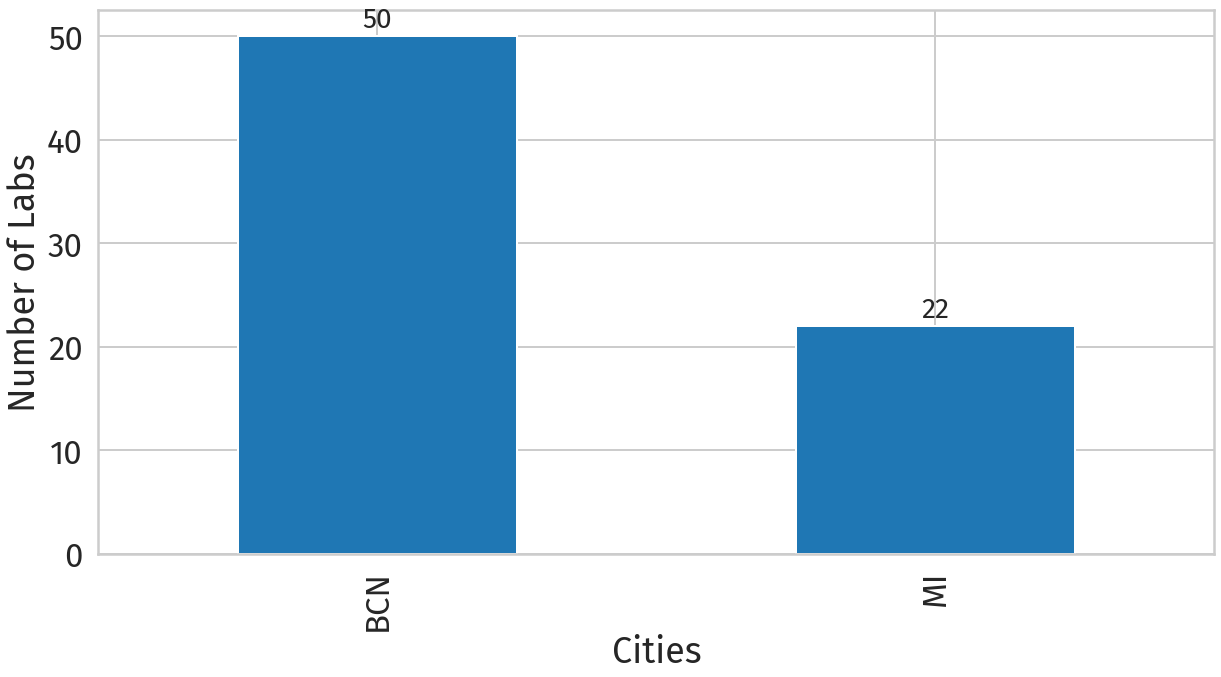

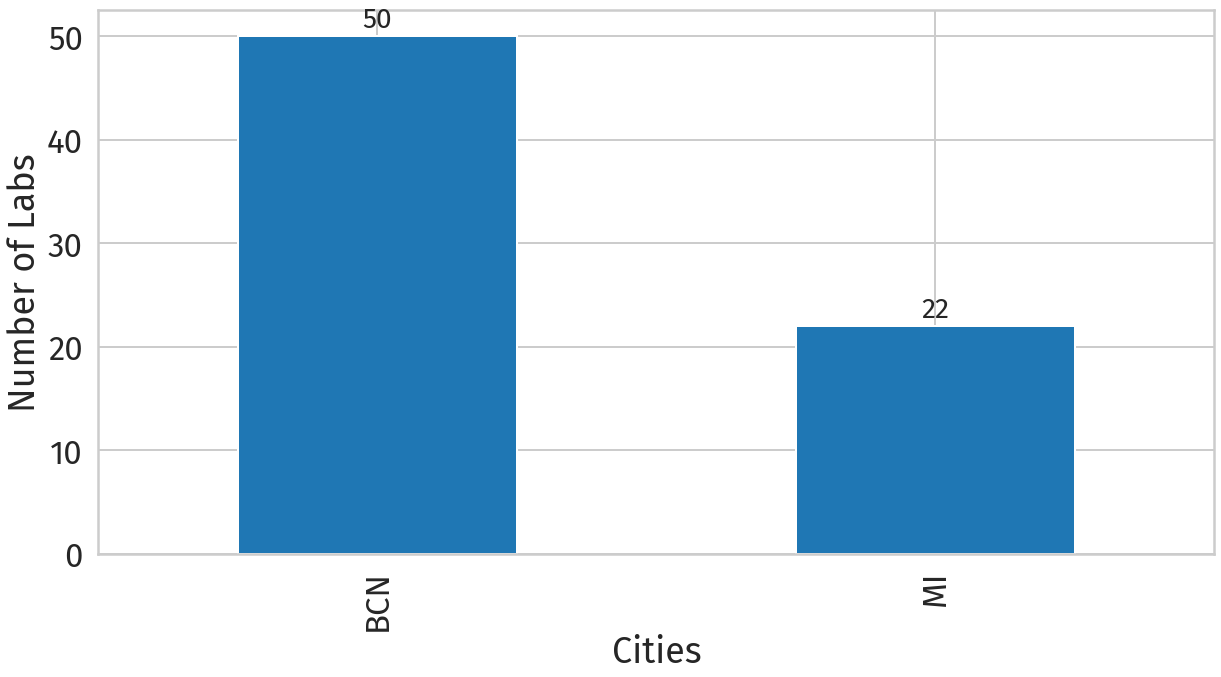

In [28]:
# Plot the data
ax = data["Cluster"].value_counts().plot(kind="bar", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Cities')
plt.ylabel('Number of Labs')
plt.savefig("svg/labs_cluster.svg", bbox_inches="tight")
plt.savefig("png/labs_cluster.png", dpi=300, bbox_inches="tight")

## Labs Type by Cluster (City)

In [29]:
gp = data.groupby('Cluster')

In [30]:
gp["Type"].sum()

Cluster
BCN    Fab LabFab LabFab LabFab LabFab LabFab LabFab ...
MI     Fab LabFab LabServiceFab LabMakerspaceFab LabU...
Name: Type, dtype: object

Cluster
BCN    Fab LabFab LabFab LabFab LabFab LabFab LabFab ...
MI     Fab LabFab LabServiceFab LabMakerspaceFab LabU...
Name: Type, dtype: object

In [31]:
data.groupby(['Cluster','Type']).size()

Cluster  Type                         
BCN      Ateneu de Fabricació              6
         City Space                        7
         DIYBio Lab                        2
         Fab Lab                          11
         FabCafé                           1
         Foundation                        2
         Hackerspace                       4
         Incubator/Accelerator             4
         Industry R&D Lab                  1
         Library                           1
         Makerspace                        4
         Service                           1
         University + Industry R&D Lab     1
         University Lab                    5
MI       DIYBio Lab                        1
         Fab Lab                           8
         Hackerspace                       2
         Incubator/Accelerator             1
         Makerspace                        6
         Service                           3
         University Lab                    1
dtype: int64

Cluster  Type                         
BCN      Ateneu de Fabricació              6
         City Space                        7
         DIYBio Lab                        2
         Fab Lab                          11
         FabCafé                           1
         Foundation                        2
         Hackerspace                       4
         Incubator/Accelerator             4
         Industry R&D Lab                  1
         Library                           1
         Makerspace                        4
         Service                           1
         University + Industry R&D Lab     1
         University Lab                    5
MI       DIYBio Lab                        1
         Fab Lab                           8
         Hackerspace                       2
         Incubator/Accelerator             1
         Makerspace                        6
         Service                           3
         University Lab                    1
dtype: int64

<AxesSubplot:ylabel='Cluster,Type'>

<AxesSubplot:ylabel='Cluster,Type'>

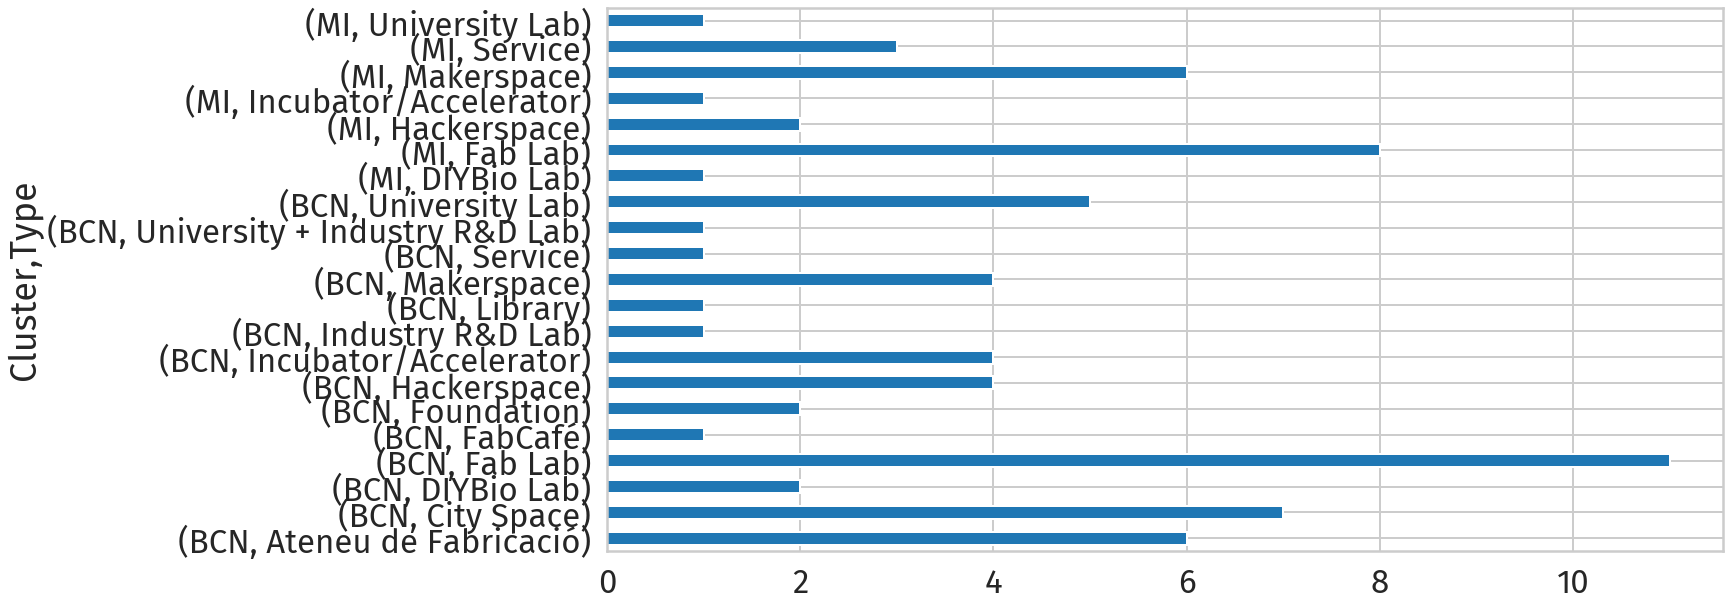

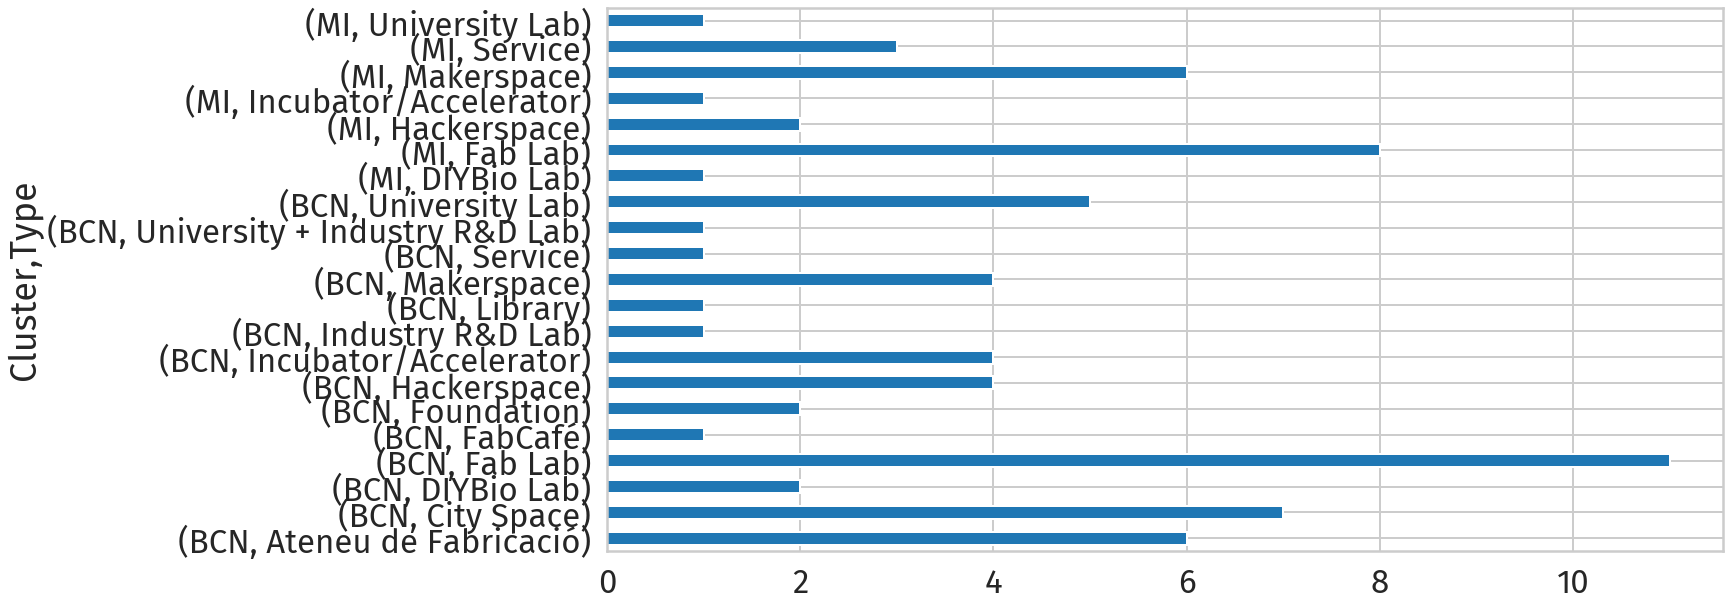

In [32]:
data.groupby(['Cluster','Type']).size().plot(kind="barh", figsize=(20,10))

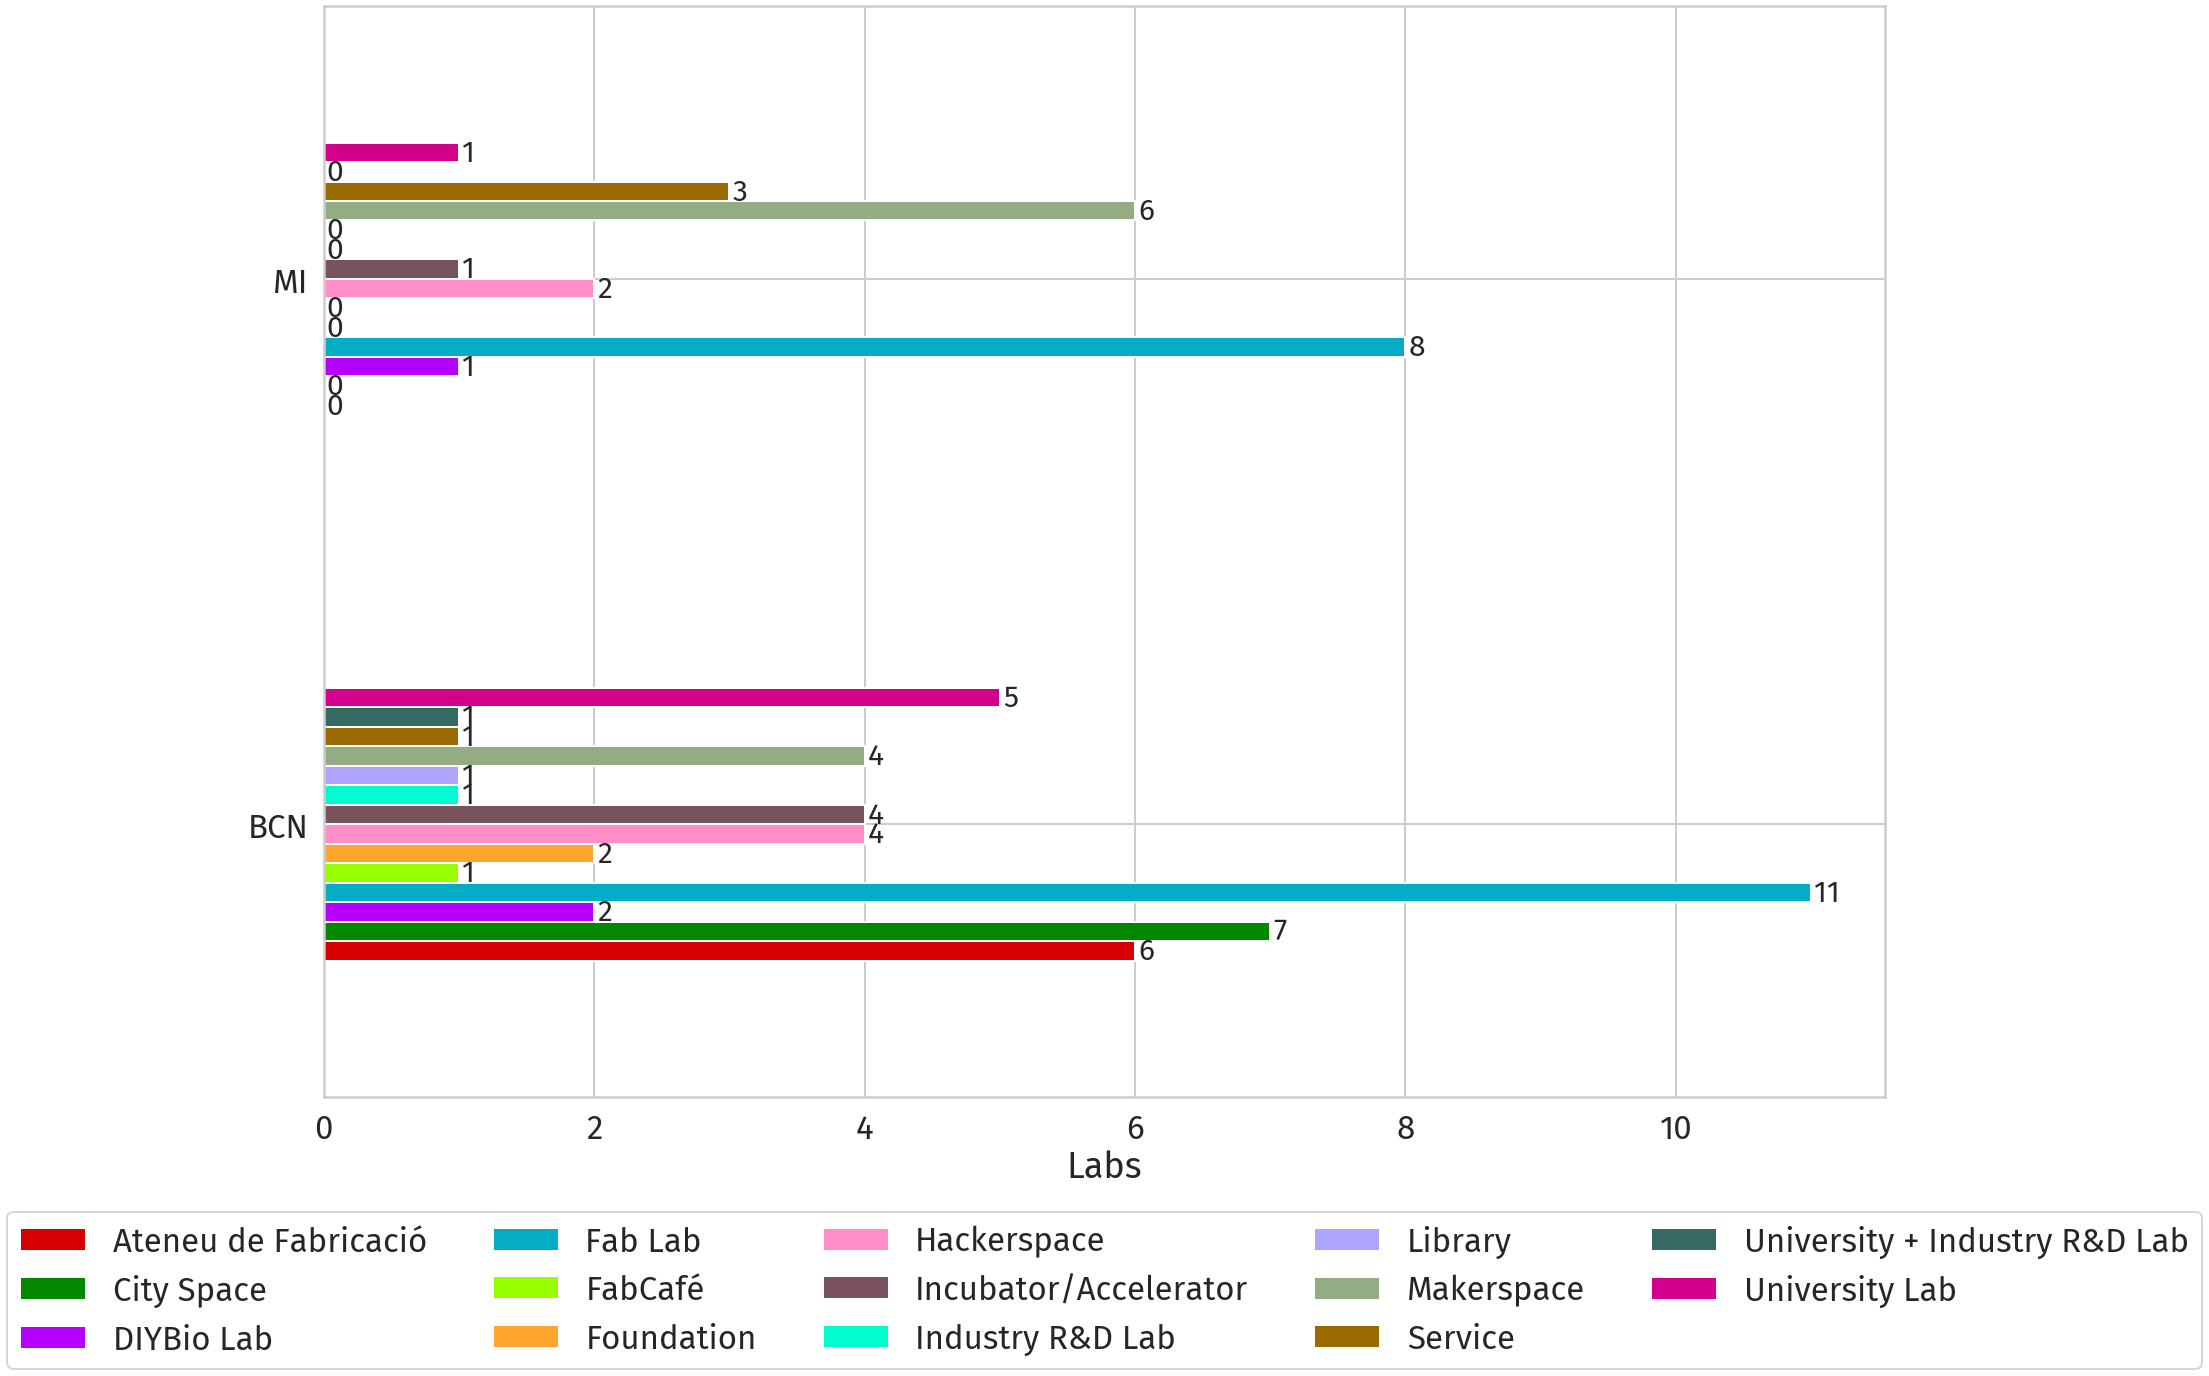

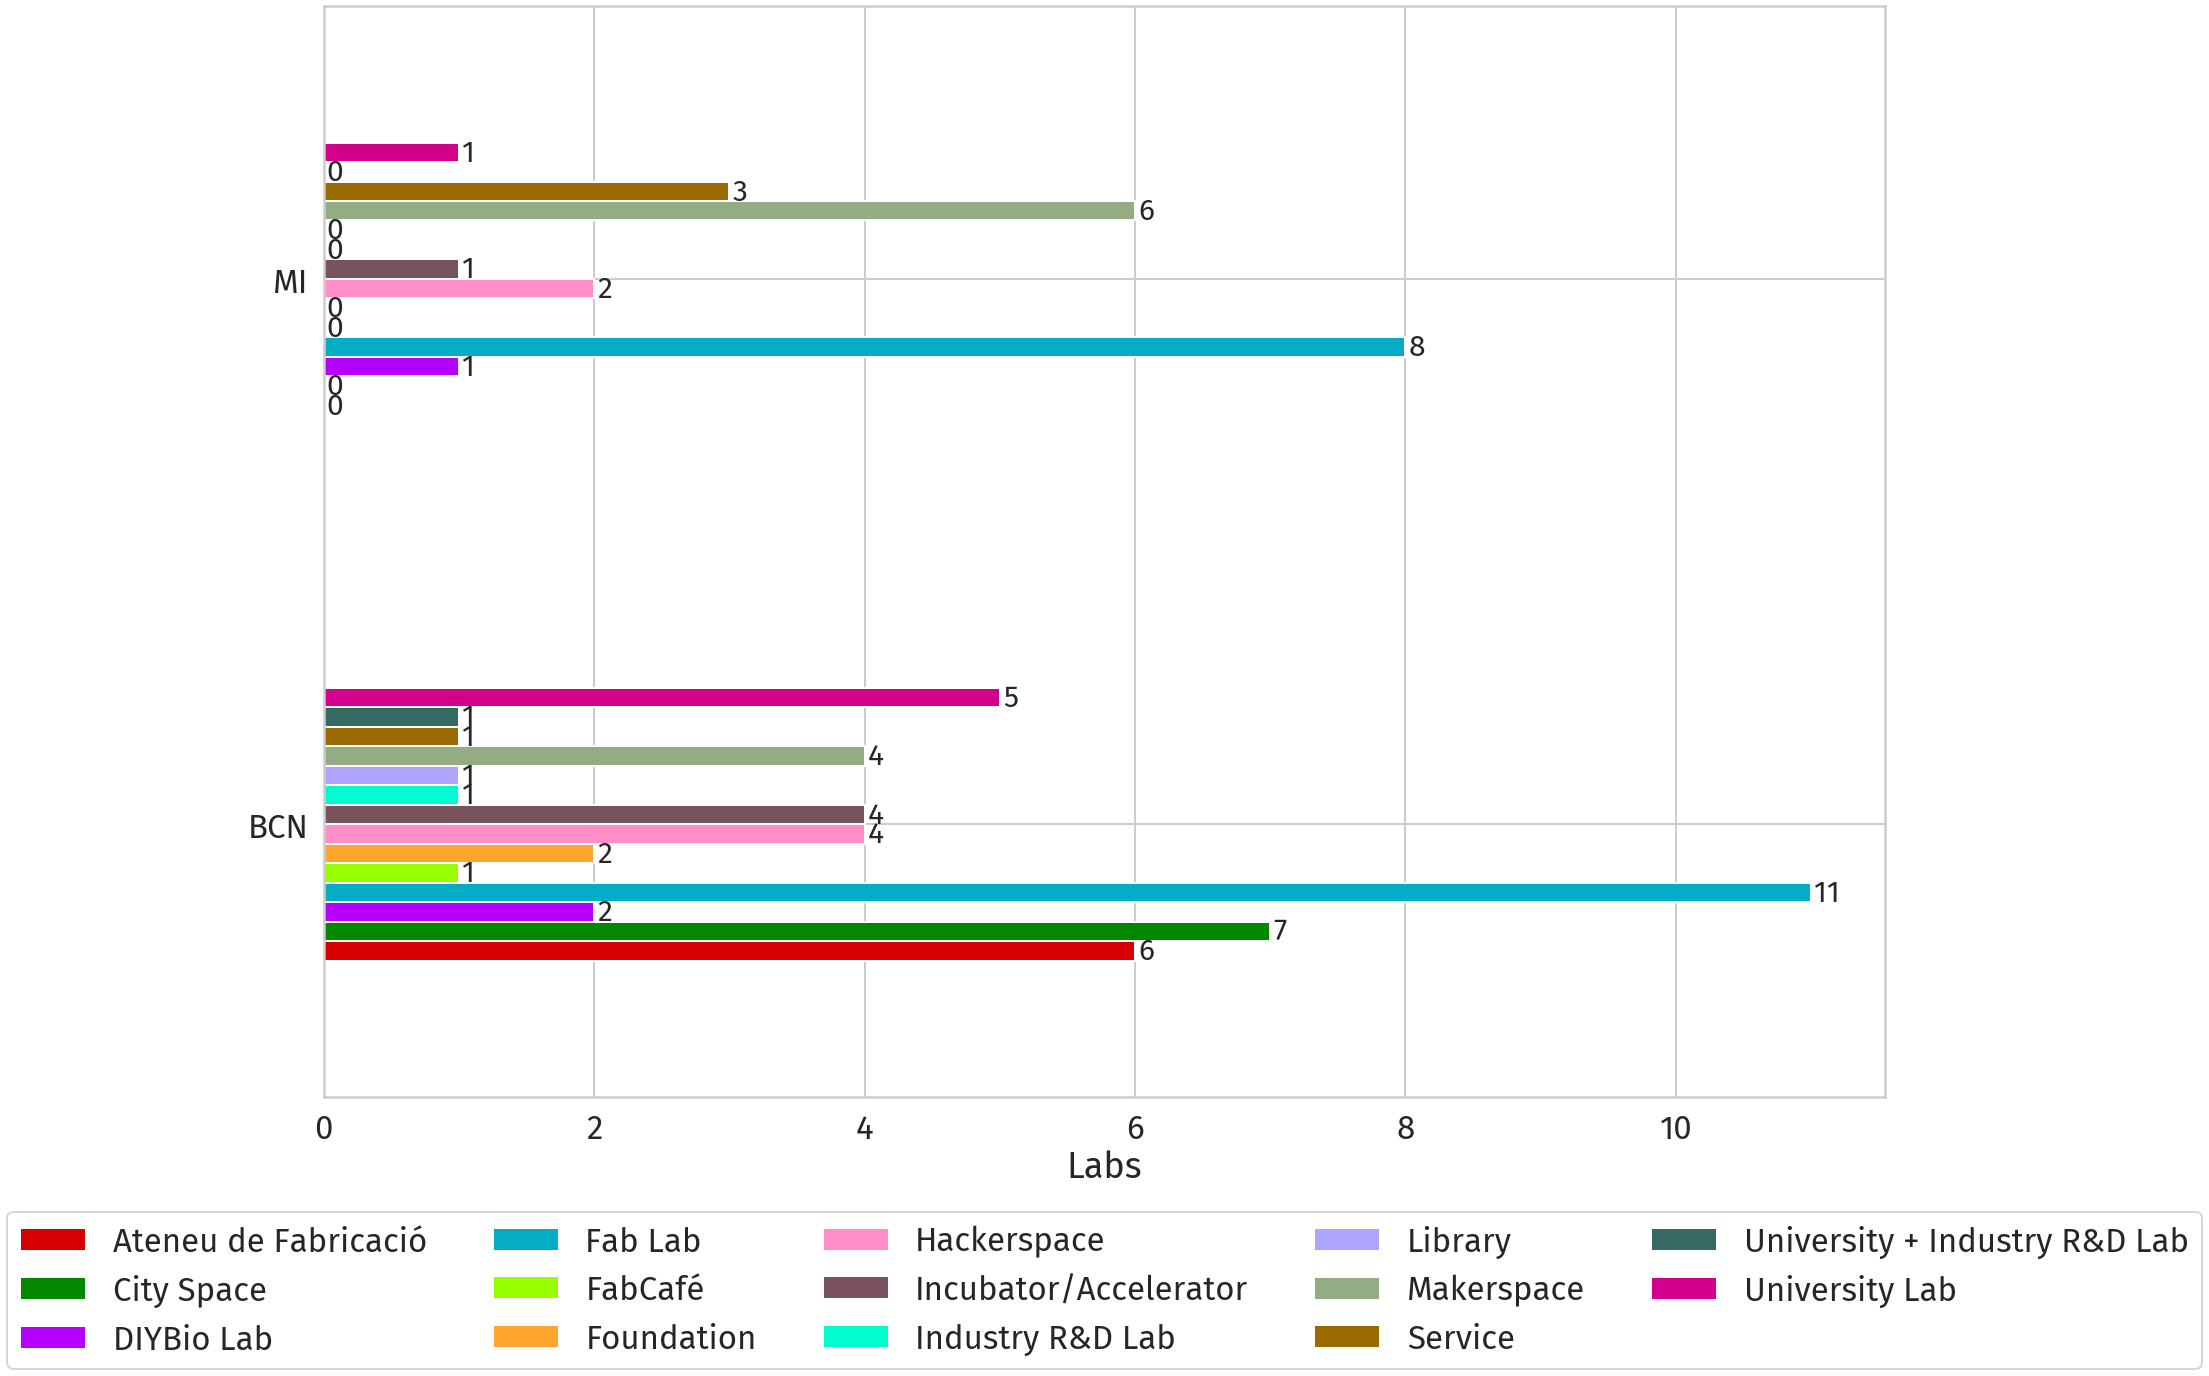

In [33]:
# Plot the data
ax = data.groupby(['Cluster','Type']).size().unstack().plot(kind='barh', figsize=(30,20), color=sns.color_palette(cc.glasbey_light, len(data.groupby(['Cluster','Type']))))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=30, padding=3)
plt.xlabel('City')
plt.xlabel('Labs')
ax.set_ylabel('')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
plt.tight_layout()
plt.savefig("svg/labs_cluster.svg", bbox_inches="tight")
plt.savefig("png/labs_cluster.png", dpi=300, bbox_inches="tight")

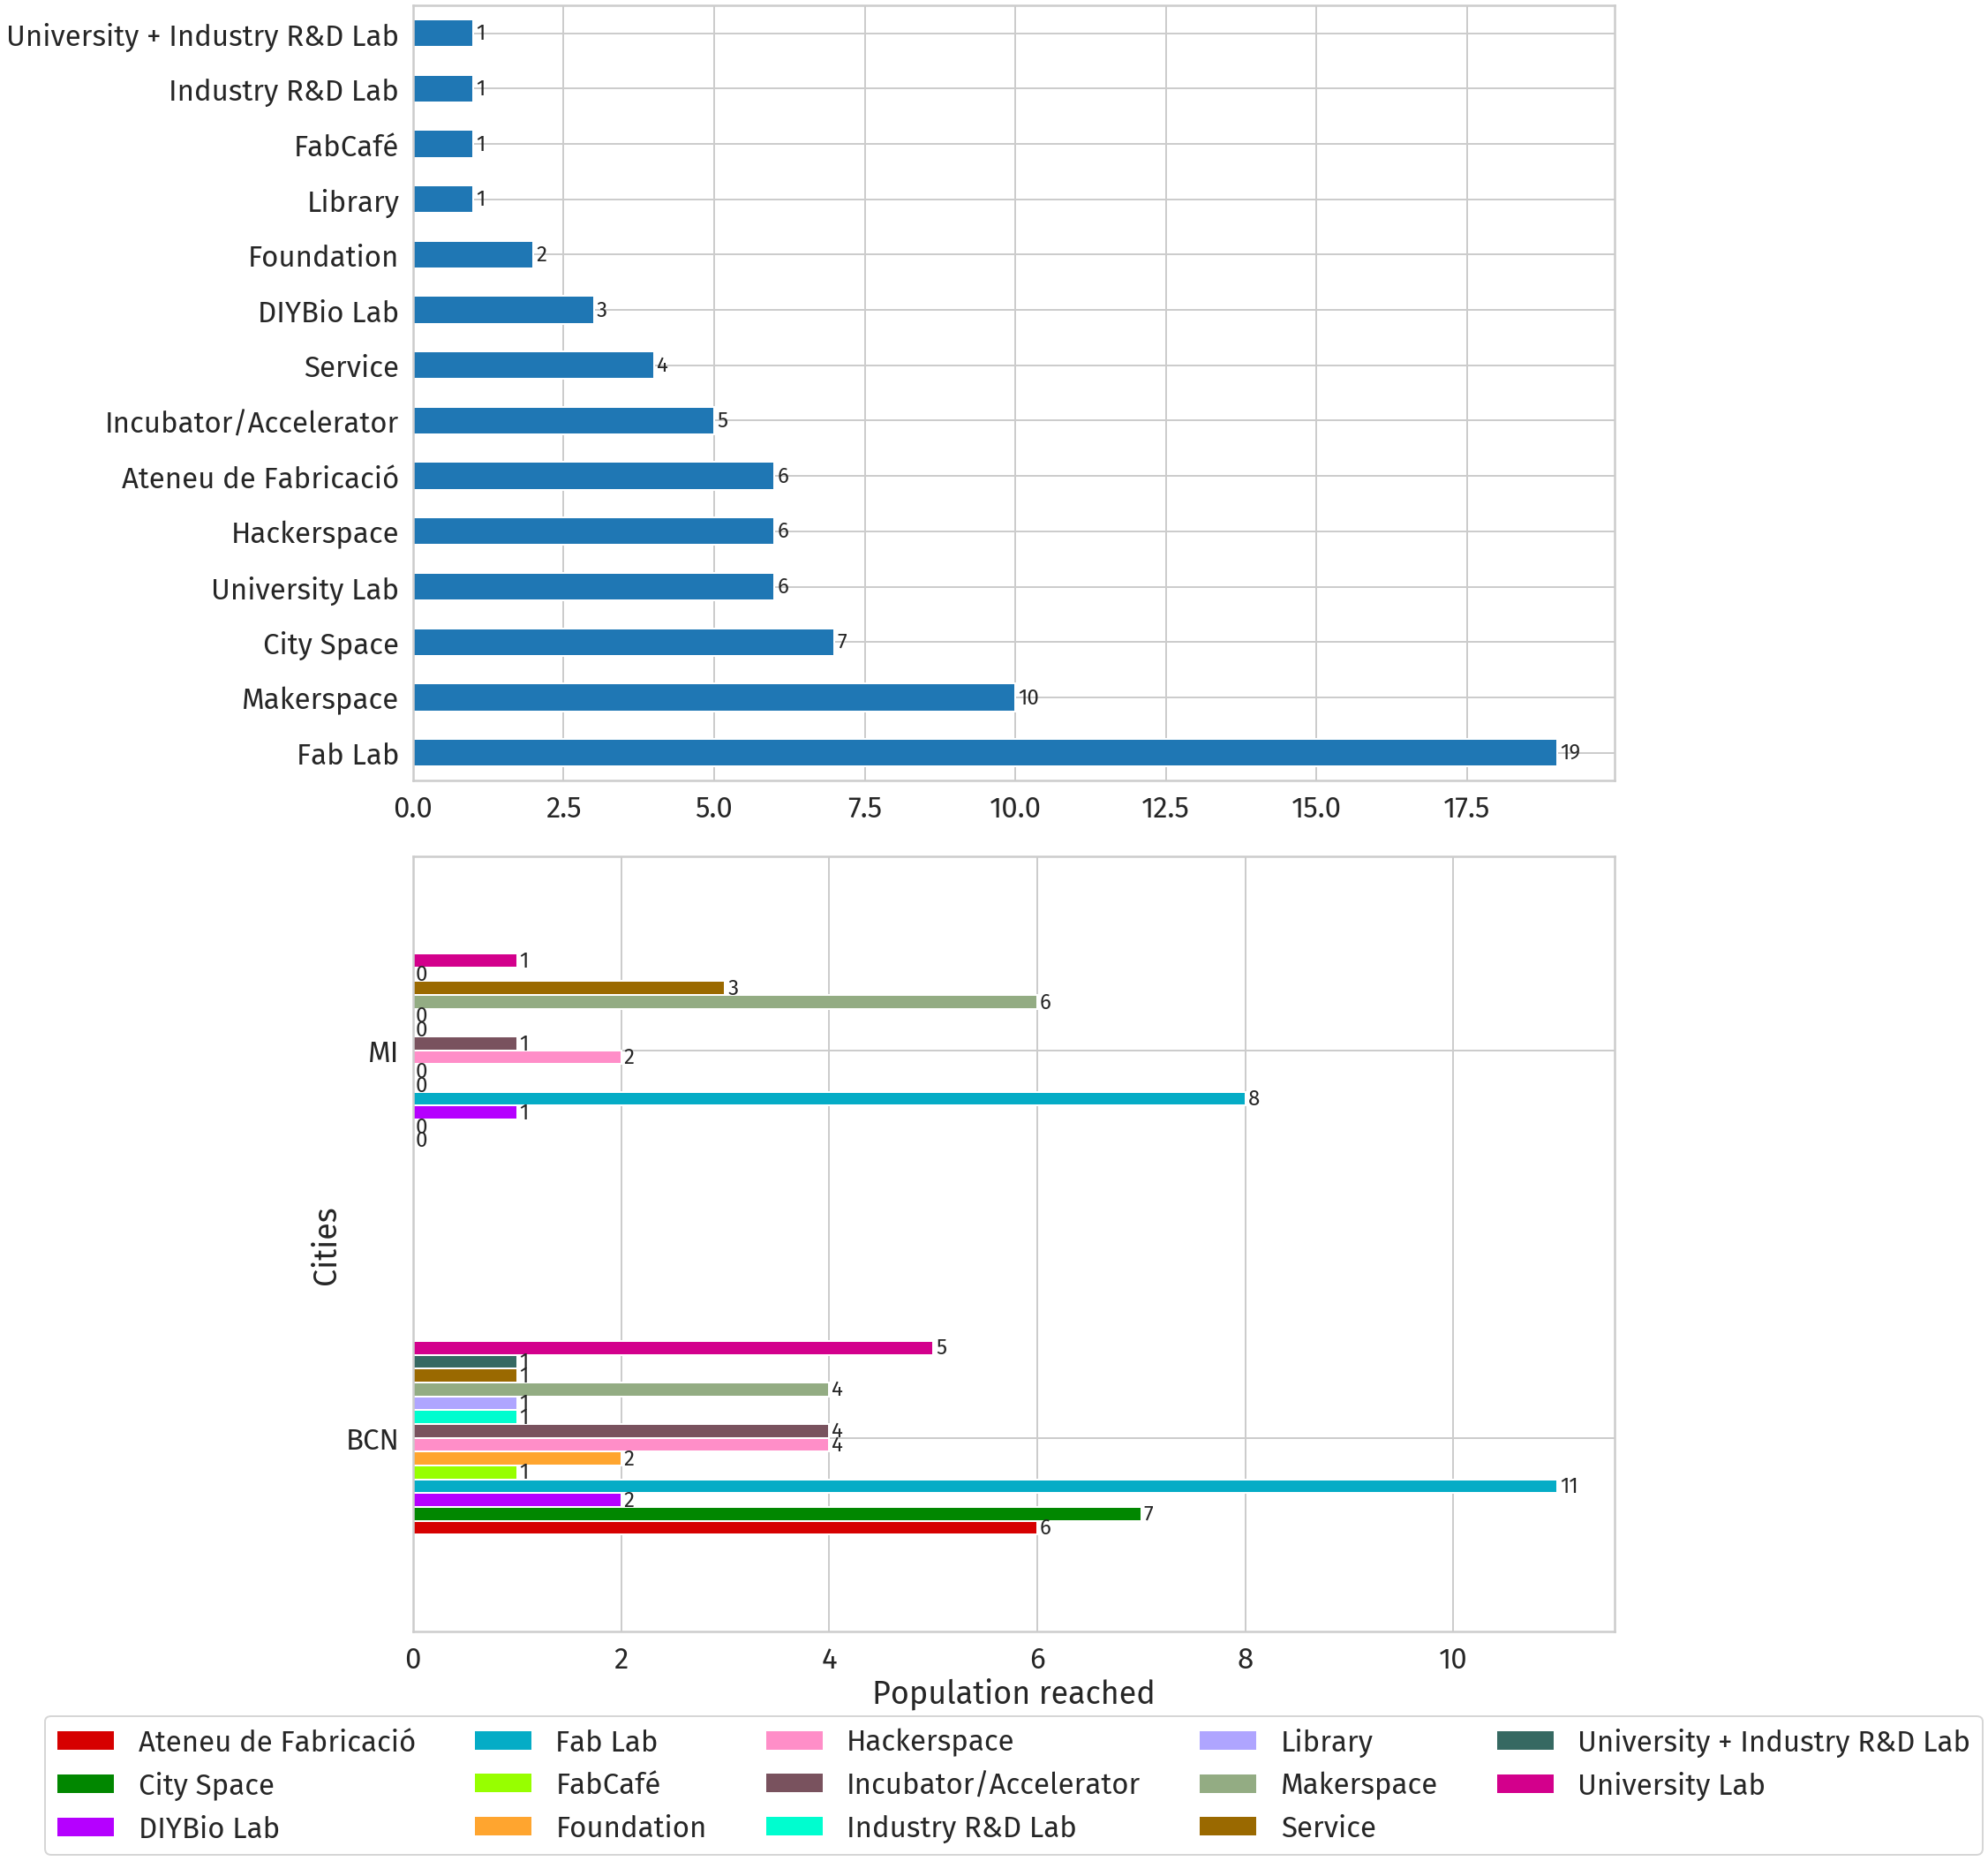

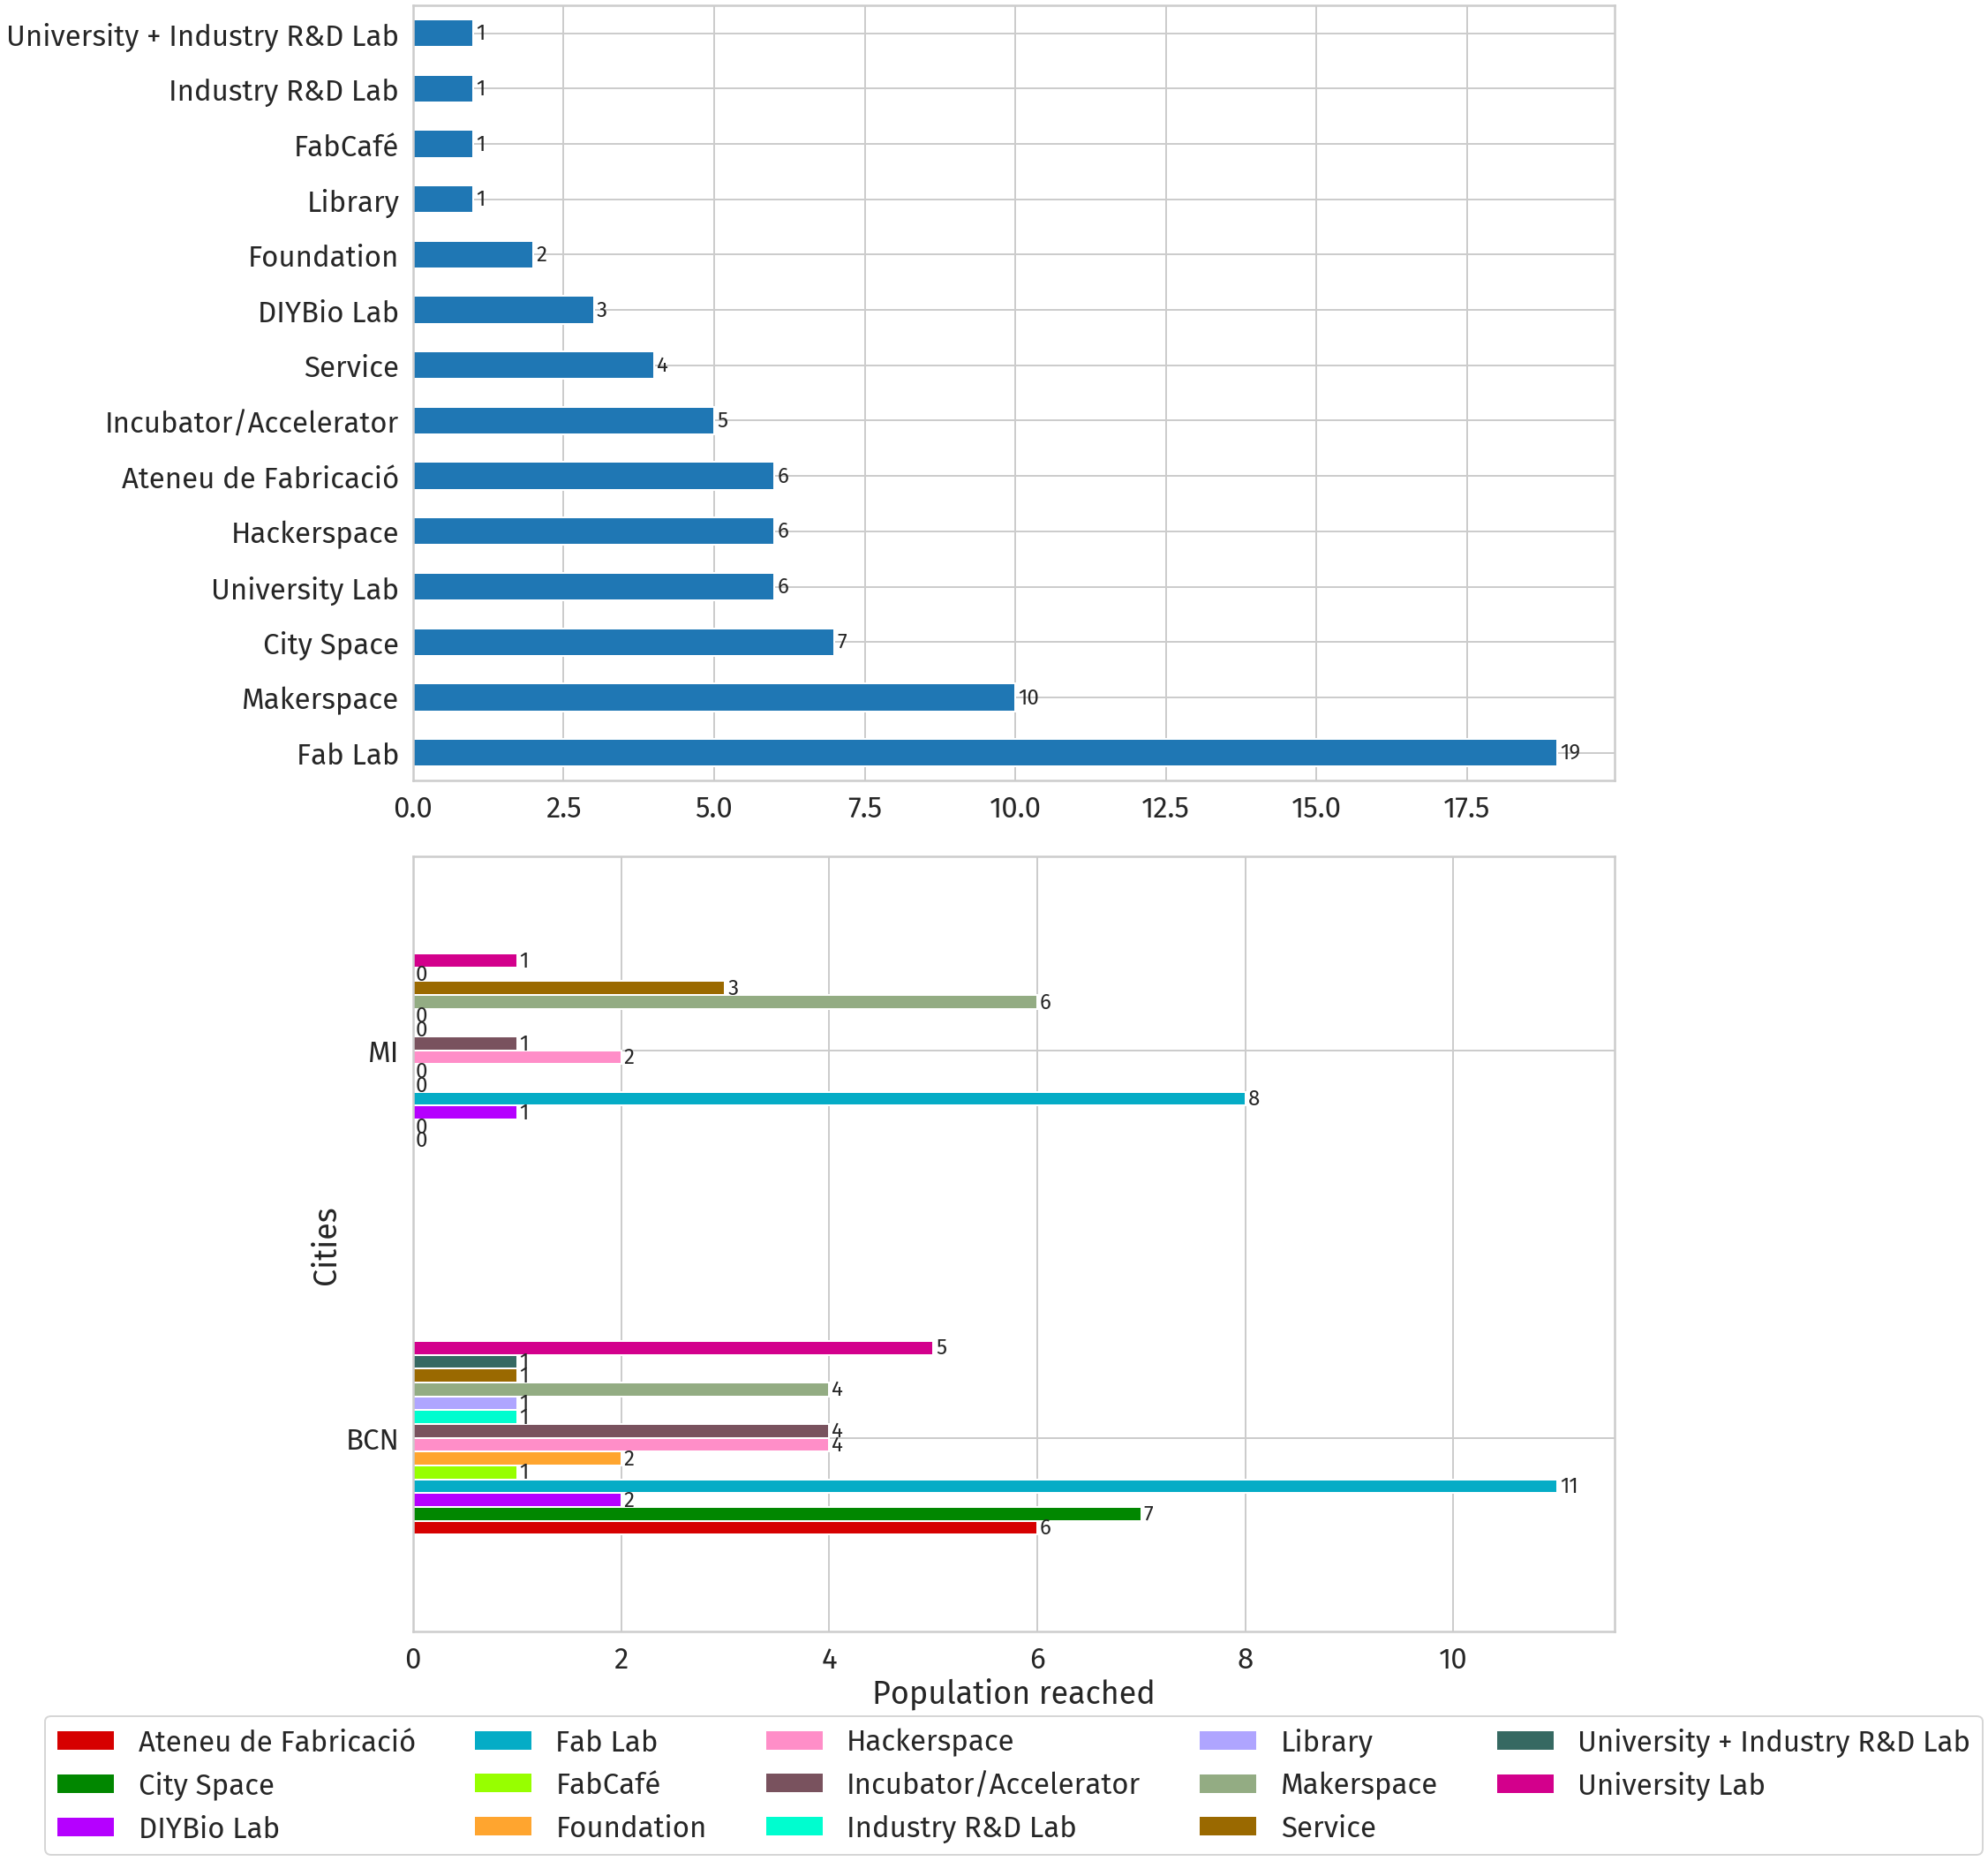

In [34]:
## Two plots together
figure, axes = plt.subplots(2, 1, figsize=(30,30))

data["Type"].value_counts().plot(ax=axes[0], kind="barh", legend=False)
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=24, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('')


data.groupby(['Cluster','Type']).size().unstack().plot(ax=axes[1], kind="barh", color=sns.color_palette(cc.glasbey_light, len(data.groupby(['Cluster','Type']))))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=24, padding=3)
#plt.xlabel('City')
#plt.xlabel('Labs')

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('Cities')

#axes[1].legend(loc='upper center', bbox_to_anchor=(0.05, -0.09), ncol=5)


plt.tight_layout()
plt.savefig("png/labs_esp_ita_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg/labs_esp_ita_number_subplot.svg", bbox_inches='tight')